<a href="https://colab.research.google.com/github/Rusbel-ray/Perceptron---Rusbel-Abarca/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

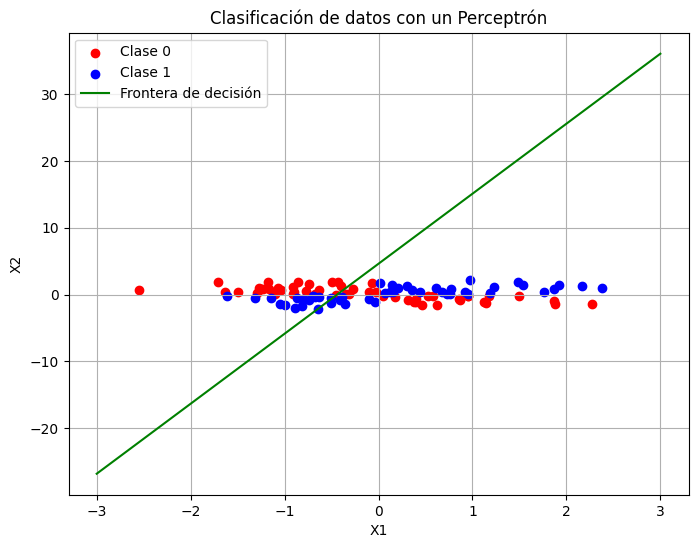

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Función de activación escalón
def funcion_activacion(y):
    return 1 if y >= 0 else 0

# Algoritmo de entrenamiento del perceptrón
def algoritmo_entrenamiento(X, D, alpha, max_epochs=1000):
    n, m = X.shape  # n = número de ejemplos, m = número de características
    W = np.random.uniform(-1, 1, m)  # Inicializar pesos aleatorios
    theta = np.random.uniform(-1, 1)  # Inicializar umbral aleatorio

    for epoch in range(max_epochs):
        total_error = 0
        for i in range(n):
            # Calcular Y
            Y = np.dot(X[i], W) - theta
            y_pred = funcion_activacion(Y)

            # Calcular el error
            error = D[i] - y_pred
            total_error += abs(error)

            # Actualizar pesos y umbral
            W += alpha * error * X[i]
            theta -= alpha * error

        # Si el error total es cero, terminar entrenamiento
        if total_error == 0:
            break

    return W, theta

# Generación de datos de prueba
np.random.seed(0)
X = np.random.randn(100, 2)
D = np.array([1 if x[0] * x[1] > 0 else 0 for x in X])  # Clases 1 o 0 dependiendo del cuadrante

# Entrenamos el modelo
alpha = 0.1
W, theta = algoritmo_entrenamiento(X, D, alpha)

# Función para predecir la clase de un punto
def predecir(X, W, theta):
    return np.array([funcion_activacion(np.dot(x, W) - theta) for x in X])

# Visualización
def graficar_frontera(X, D, W, theta):
    # Graficar puntos de datos
    plt.figure(figsize=(8, 6))
    plt.scatter(X[D == 0][:, 0], X[D == 0][:, 1], color="red", label="Clase 0")
    plt.scatter(X[D == 1][:, 0], X[D == 1][:, 1], color="blue", label="Clase 1")

    # Frontera de decisión
    x_vals = np.linspace(-3, 3, 100)
    y_vals = -(W[0] * x_vals - theta) / W[1]
    plt.plot(x_vals, y_vals, color="green", label="Frontera de decisión")

    # Configuración del gráfico
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend()
    plt.title("Clasificación de datos con un Perceptrón")
    plt.grid(True)
    plt.show()

# Graficamos los resultados
graficar_frontera(X, D, W, theta)
